In [10]:
import joblib
import pandas as pd
import shap

In [11]:
X_test = pd.read_csv(r"..\data\processed\X_test.csv")

model = joblib.load("../app/models/churn_model_v1.pkl", "rb") 

In [12]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [22]:
shap_values

array([[-0.08314999,  0.28008687, -0.29927075, ..., -0.02249547,
         0.3504622 , -0.13326696],
       [ 0.07398584, -0.1039253 , -0.33389246, ..., -0.02812361,
        -0.39748797, -0.20328283],
       [ 0.0560948 , -0.04474757,  0.2678371 , ..., -0.0125237 ,
         0.40425357,  0.06173027],
       ...,
       [ 0.2010383 , -0.17853904,  0.23087434, ..., -0.00159296,
         0.40555087, -0.05156735],
       [ 0.24513668, -0.26069614, -0.23638028, ..., -0.00220659,
         0.41799176, -0.18109648],
       [ 0.08679333,  0.6589531 , -0.16306393, ..., -0.00428948,
        -0.47425497, -0.02289847]], shape=(2000, 10), dtype=float32)

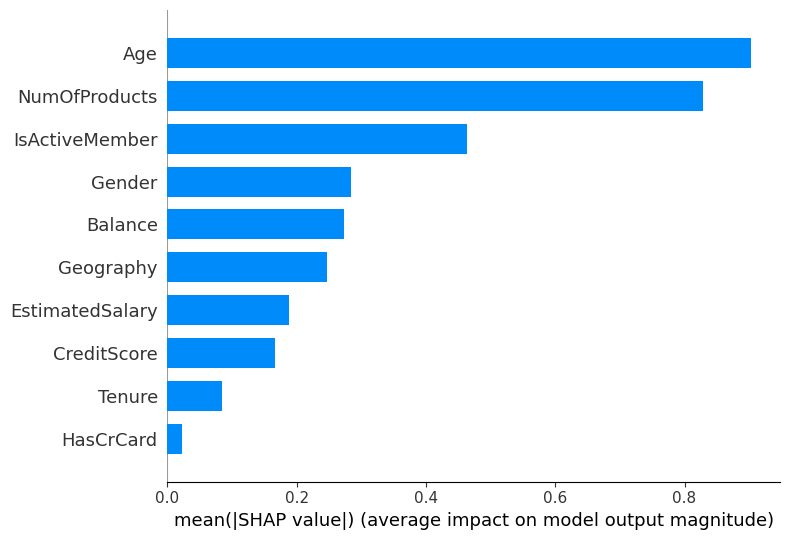

In [13]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


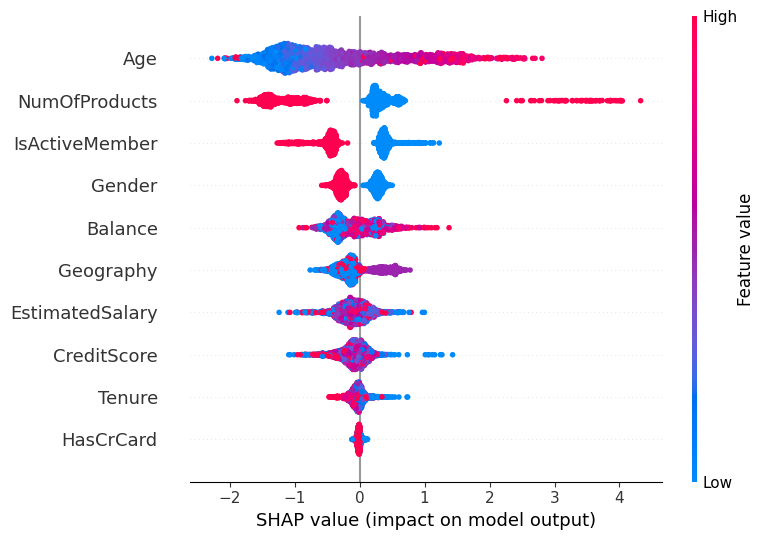

In [23]:
shap.summary_plot(shap_values, X_test)

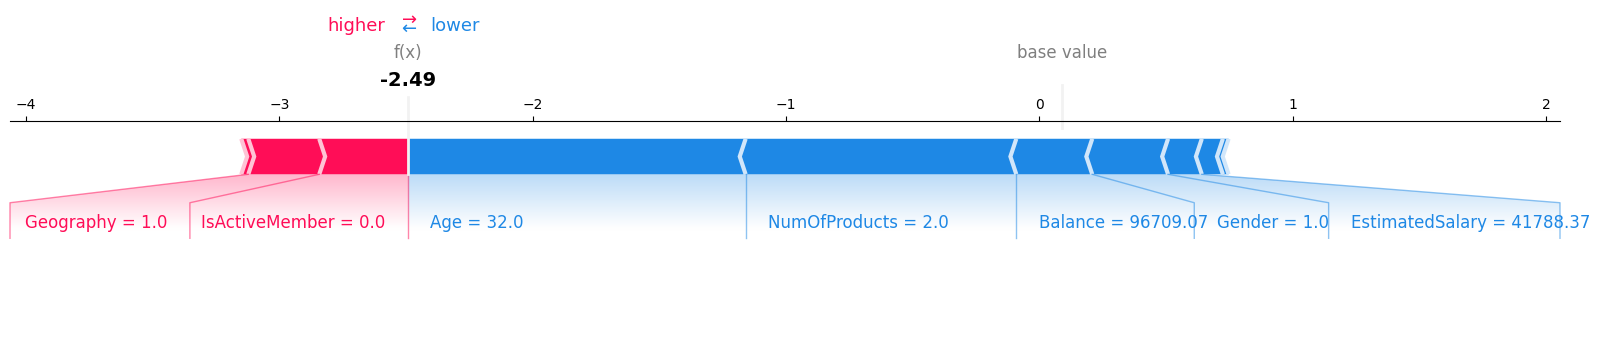

In [20]:
i = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test.iloc[i, :],
    matplotlib=True
)


In [21]:
joblib.dump(explainer, "../app/models/shap_explainer.pkl")
print("SHAP explainer saved.")


SHAP explainer saved.


Key Insights 
1. Age — strongest driver

High age (red points) → increases churn probability strongly

Younger customers (blue) → lower churn
This makes Age the single most important risk indicator.

2. NumOfProducts — non-linear effect

Customers with 1 product → high churn

Customers with 2+ products → lower churn
Products act as “stickiness”.

3. IsActiveMember — strong monotonic effect

Active members churn far less

Inactive members → strong positive SHAP values → higher churn

4. Gender shows meaningful patterns

Females (depending on encoding) tend to churn more in this dataset
SHAP shows one gender creating positive SHAP values, the other negative.

5. Balance

Higher balance → slightly higher churn

Zero-balance customers → lower churn
Balance captures customer wealth and type.

6. Geography

Germany customers → higher churn

France customers → lower churn
This was also confirmed from EDA.

7. EstimatedSalary, CreditScore

These have modest impact

But still contribute meaningful marginal patterns

8. Tenure & HasCrCard

Very low signal

Confirmed by low SHAP magnitude